<a href="https://colab.research.google.com/github/srehaag/legal_info_tech_w25/blob/main/Solutions_Module3_Assignment_w25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 3: Assignment Solutions

There isn't usually just one way to solve a coding problem. This notebook offers some examples of how you might approach the assignment questions -- but these are not the only possible approaches.

Recall that modules are graded as a compoent of particiaption grades on a fail, pass, high pass basis. Students receive a high pass if they make a meaningful effort to complete the module. Pass grades are where students mostly complete the assignment but should have put more effort into the assignment. And fail is where the assignment is not mostly complete and insufficient effort was put into the assignment.

If you would like further feedback on your completed assignment, including invidivualized feedback on your coding, please drop in during the "Study with me" sessions, or reach out by email.

### Beginner Question 1:

Using the [FCA dataset](https://huggingface.co/datasets/refugee-law-lab/canadian-legal-data) from the Refugee Law Lab, print the names of the five most recent Federal Court of Appeal cases in the dataset.

In [17]:
#!pip install datasets

# load dataset
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="FCA")

# convert to dataframe
import pandas as pd
df = pd.DataFrame(dataset)

# print df.name for five most recent document_date
df.sort_values(by='document_date', ascending=False).head(5)['name']

,name
7329,Amazon.com.ca ULC v. Canada (Attorney General)
7328,Sodecia Canada Investments Inc. v. Canada
7327,Hu v. Canada (Attorney General)
7326,Giffen v. TM Mobility Inc.
7325,Steelhead LNG (ASLNG) Ltd. v. ARC Resources Ltd.


### Beginner Question 2:

Using the [FCA dataset](https://huggingface.co/datasets/refugee-law-lab/canadian-legal-data) from the Refugee Law Lab, make a line chart with the average number FCA decisions per year over the past 10 years.

<Axes: xlabel='year'>

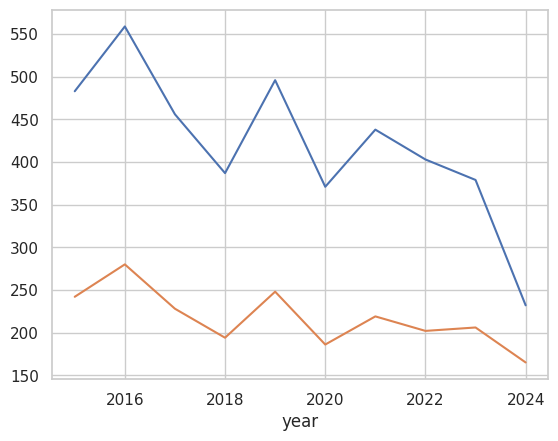

In [18]:
# load dataset
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="FCA")

# convert to dataframe
import pandas as pd
df = pd.DataFrame(dataset)

# filter df to include only those list(range(2015, 2025)) in df.year
df = df[df['year'].isin(range(2015, 2025))].reset_index(drop=True)

# line chart for number of decisions for each df.year
df.groupby('year').size().plot()

# NOTE: Depending on how you interpret the question, you could choose to filter
# for just one language to avoid double counting translated decisions:
df = df[df['language'] == 'en']
df.groupby('year').size().plot()



year
2015    483
2016    559
2017    456
2018    387
2019    496
2020    371
2021    438
2022    403
2023    379
2024    232
dtype: int64


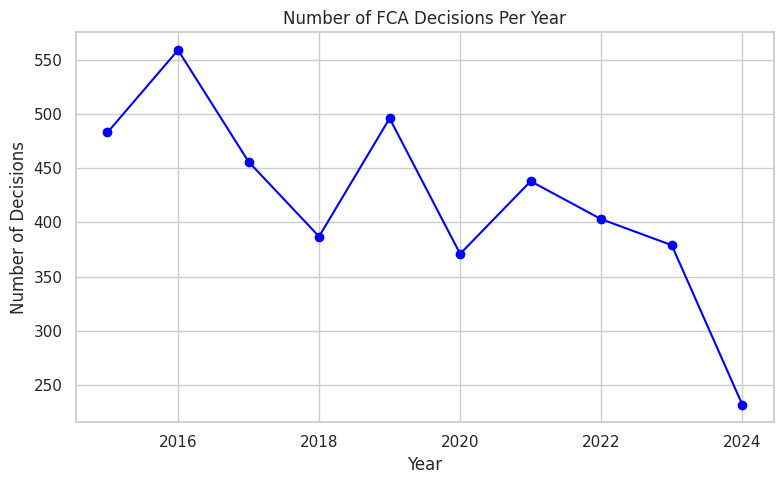

In [19]:
# alternative approach using matplotlib
# credit to Stephanie Young

#!pip install datasets

# load dataset
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="FCA")

# convert to dataframe
import pandas as pd
df = pd.DataFrame(dataset)

# create chart
import matplotlib.pyplot as plt

decisions_per_year = df.groupby('year').size()
last_10_years = decisions_per_year[-10:]
print(last_10_years)

plt.figure(figsize=(8, 5))
plt.plot(last_10_years.index, last_10_years.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Decisions")
plt.title("Number of FCA Decisions Per Year")
plt.grid(True)
plt.tight_layout()
plt.show()

### Beginner Question 3:

Using the Refugee Law Lab's [Canadian Legal Data](https://huggingface.co/datasets/refugee-law-lab/canadian-legal-data) dataset, pick two courts/tribunals, and create line charts for the number of words per decision per year for the past ten years for each of the two courts/tribunals. What is the most interesting change over this time that you observe?


<Axes: xlabel='year'>

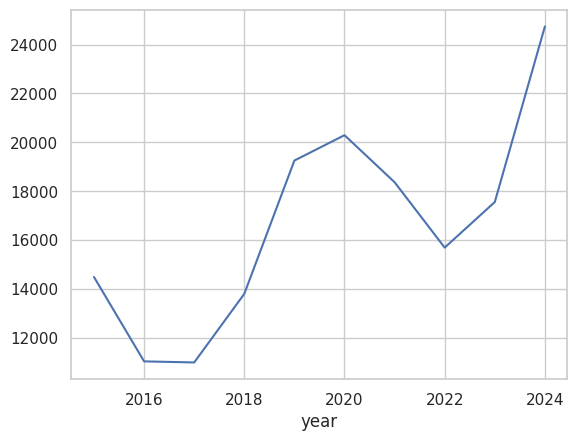

In [20]:
# Tried Supreme Court of Canada

# load dataset
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="SCC")

# convert to dataframe
import pandas as pd
df = pd.DataFrame(dataset)

# filter df to include only those list(range(2015, 2025)) in df.year
df = df[df['year'].isin(range(2015, 2025))].reset_index(drop=True)

# add df.word_count with the number of words in df.unoffical_text
df['word_count'] = df['unofficial_text'].apply(lambda x: len(x.split()))

# line chart for average word_count per year
df.groupby('year')['word_count'].mean().plot()

<Axes: xlabel='year'>

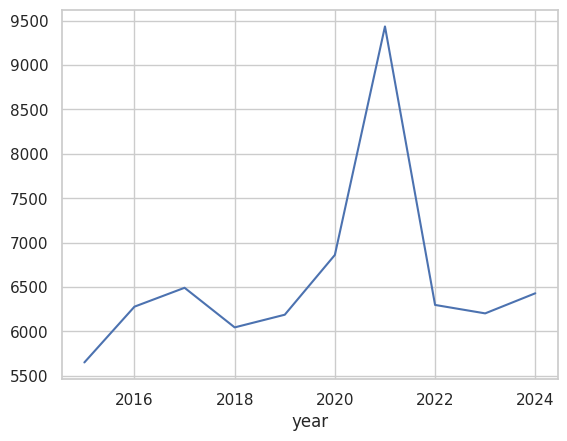

In [21]:
# Tried Tax Court of Canada

# load dataset
from datasets import load_dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="TCC")

# convert to dataframe
import pandas as pd
df = pd.DataFrame(dataset)

# filter df to include only those list(range(2015, 2025)) in df.year
df = df[df['year'].isin(range(2015, 2025))].reset_index(drop=True)

# add df.word_count with the number of words in df.unoffical_text
df['word_count'] = df['unofficial_text'].apply(lambda x: len(x.split()))

# line chart for average word_count per year
df.groupby('year')['word_count'].mean().plot()

### Observation

SCC decisions are long! And they're getting longer.

TCC decisons aren't as long, but they're also getting longer (although there seems to have been a bit of a dip recently).

### Intermediate Question 1:

Using the [FC (Federal Court) dataset](https://huggingface.co/datasets/refugee-law-lab/canadian-legal-data) from the Refugee Law Lab, print the names of the ten Supreme Court cases that have most frequently been cited by the Federal Court over the past 10 years.

Hint: neutral citations follow specific patterns (e.g. YYYY SCC #).

In [26]:
from datasets import load_dataset
import pandas as pd

# load fc dataset & filter for years 2015 to 2024 and english only
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="FC")
df_fc = pd.DataFrame(dataset)
df_fc = df_fc[df_fc['year'].isin(range(2015, 2025))].reset_index(drop=True)
df_fc = df_fc[df_fc['language'] == 'en'].reset_index(drop=True)

# load scc dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="SCC")
df_scc = pd.DataFrame(dataset)

# get SCC citations
import re
from collections import Counter

scc_pattern = r'\b\d{4} SCC \d{1,3}\b'

citations = []
for unofficial_text in df_fc['unofficial_text']:
    matches = re.findall(scc_pattern, str(unofficial_text))
    citations.extend(matches)

# get 10 most common citations
top_ten_citations = Counter(citations).most_common(10)

# for each of the top_ten_citations, match [0] with df_scc.citation
# and get df_scc.name
for citation in top_ten_citations:
    print(df_scc[df_scc['citation'] == citation[0]]['name'].values[0])



Canada (Minister of Citizenship and Immigration) v. Vavilov
Dunsmuir v. New Brunswick
Canada (Citizenship and Immigration) v. Khosa
Newfoundland and Labrador Nurses' Union v. Newfoundland and Labrador (Treasury Board)
Kanthasamy v. Canada (Citizenship and Immigration)
Mission Institution v. Khela
Canada Post Corp. v. Canadian Union of Postal Workers
Agraira v. Canada (Public Safety and Emergency Preparedness)
Alberta (Information and Privacy Commissioner) v. Alberta Teachers' Association
Mason v. Canada (Citizenship and Immigration)


In [25]:
# Alternative approach: Credit to Saul Rosal

from datasets import load_dataset
import pandas as pd

# load fc dataset & filter for years 2015 to 2024 and english only
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="FC")
df_fc = pd.DataFrame(dataset)
df_fc = df_fc[df_fc['year'].isin(range(2015, 2025))].reset_index(drop=True)
df_fc = df_fc[df_fc['language'] == 'en'].reset_index(drop=True)

# in df_fc[unoffical_text] find phrases that include 'YYYY SCC #' and count the most common 10 phrases.
dfCit = df_fc['unofficial_text'].str.extractall(r'(\d{4} SCC \d+)')[0].value_counts().head(10)

# load scc dataset
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="SCC")
df_scc = pd.DataFrame(dataset)

# for citations in dfCit, find the coreesponding rows in dfSCC[citation], and print the row's coresponding dfSCC['name']
for citation in dfCit.index:
    print(df_scc[df_scc['citation'] == citation]['name'].values[0])

Canada (Minister of Citizenship and Immigration) v. Vavilov
Dunsmuir v. New Brunswick
Canada (Citizenship and Immigration) v. Khosa
Newfoundland and Labrador Nurses' Union v. Newfoundland and Labrador (Treasury Board)
Kanthasamy v. Canada (Citizenship and Immigration)
Mission Institution v. Khela
Canada Post Corp. v. Canadian Union of Postal Workers
Agraira v. Canada (Public Safety and Emergency Preparedness)
Alberta (Information and Privacy Commissioner) v. Alberta Teachers' Association
Mason v. Canada (Citizenship and Immigration)


### Intermediate Question 2:

Load into a dataframe the excel data that reports tabular data about Supreme Court of Canada decisions discussed in the Module 2 videos available at this URL:

    https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx

For the meaning of the values of codes in the excel data, see the coding manual [here](https://litigate.com/assets/uploads/20220216-111705-4622-Lenczner-Slaght-Supreme-Court-of-Canada-Database-Coding-Manual-v-2022.01.pdf).

Print a list the names of the 5 judges who wrote the largest number of majority opinions in the dataset, and then print a bar chart with their names and the number of majority opinions in the dataset that each of them wrote.

Do you have any theories as to why these 5 judges in particular wrote the largest number of majority opinions?

In [23]:
import pandas as pd

# load case df
url = "https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx"
df_case = pd.read_excel(url, sheet_name='Case')

# remove rows where no majorityWriter
df_case = df_case[df_case['majorityWriter']!=0].reset_index(drop=True)

# get the five most common df_case.majorityWriter
top_5_justices = df_case['majorityWriter'].value_counts().head(5)

# print the five most common df_case.majorityWriter
print(top_5_justices)

# get name of judge that corresponds with id
df_judges = pd.read_excel(url, sheet_name='JusticesPresent')
df_judges = df_judges.drop_duplicates(subset=['justiceID'], keep='first')

# for each judge in top_5_justices, get df_judges.justiceName that corresponds
# with the justiceID in [0]
for justice in top_5_justices.index:
    print(df_judges[df_judges['justiceID'] == justice]['justiceName'].values)



majorityWriter
67    373
59    340
45    323
51    293
47    272
Name: count, dtype: int64
['BMcLachlin']
['ALamer']
['RMartland']
['BLaskin']
['RARitchie']


### Advanced Question 1:

Using the datasets for Intermediate Questions 1 and 2, print out the names of the 10 Supreme Court judges with the most citations by the Federal Court since 2010. For simplicity, assume that when a case is cited by the Federal Court, the Federal Court is citing the majority opinion.

In [24]:
from datasets import load_dataset
import pandas as pd
import re
from collections import Counter

# load fc dataset & filter for years 2010 to 2024, and english only
dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train", data_dir="FC")
df_fc = pd.DataFrame(dataset)
df_fc = df_fc[df_fc['year'].isin(range(2010, 2025))].reset_index(drop=True)
df_fc = df_fc[df_fc['language'] == 'en']

# get SCC citations
scc_pattern = r'\b\d{4} SCC \d{1,3}\b'
citations = []
for unofficial_text in df_fc['unofficial_text']:
    matches = re.findall(scc_pattern, str(unofficial_text))
    citations.extend(matches)

# create new df_citations
df_citations = pd.DataFrame(citations, columns=['citation'])

# load case df
url = "https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx"
df_case = pd.read_excel(url, sheet_name='Case')

# where df_citations.citation matches df_case.neutralCitation, get the
# df_case.majorityWriter and upt it in df_citations.majorityWriter
df_citations = df_citations.merge(df_case[['neutralCitation', 'majorityWriter']],
                                  left_on='citation',
                                  right_on='neutralCitation',
                                  how='left')
df_citations.drop(columns=['neutralCitation'], inplace=True)

# get 10 most common df_citations.majorityWriter
top_10_justices = df_citations['majorityWriter'].value_counts().head(10)

# print the 10 most common df_citations.majorityWriter
print(top_10_justices)

# get name of judge that corresponds with id
df_judges = pd.read_excel(url, sheet_name='JusticesPresent')
df_judges = df_judges.drop_duplicates(subset=['justiceID'], keep='first')

# Convert top_10_justices index (majorityWriter) to a DataFrame for merging
top_10_justices_df = top_10_justices.reset_index()
top_10_justices_df.columns = ['majorityWriter', 'count']

# Merge with df_judges to get judge names
top_10_justices_df = top_10_justices_df.merge(df_judges[['justiceID', 'justiceName']],
                                              left_on='majorityWriter',
                                              right_on='justiceID',
                                              how='left')

# Drop the justiceID column since we only need the judge names
top_10_justices_df.drop(columns=['justiceID'], inplace=True)

# Rename columns for clarity
top_10_justices_df.rename(columns={'justiceName': 'Judge Name'}, inplace=True)

top_10_justices_df




majorityWriter
71.0    6690
82.0    5332
72.0    5134
77.0    4098
67.0    3881
74.0    2486
79.0    1634
69.0    1054
87.0     802
80.0     759
Name: count, dtype: int64


,majorityWriter,count,Judge Name
0,71.0,6690,MBastarache
1,82.0,5332,MJMoldaver
2,72.0,5134,WICBinnie
3,77.0,4098,RSAbella
4,67.0,3881,BMcLachlin
5,74.0,2486,LLeBel
6,79.0,1634,MRothstein
7,69.0,1054,FIacobucci
8,87.0,802,MRowe
9,80.0,759,TACromwell
